# Клиенты авиакомпании

Датасет содержит информацию о клиентах некоторой авиакомпании

## Импорт библиотек, константы

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
RANDOM_STATE = 42

In [3]:
DATASET_PATH = "https://raw.githubusercontent.com/evgpat/edu_stepik_from_idea_to_mvp/main/datasets/clients.csv"

## Загрузка и обзор данных

### Загрузка

In [4]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)

### Описание данных

**Целевая переменная**
- `satisfaction`: удовлетворенность клиента полетом, бинарная (*satisfied* или *neutral or dissatisfied*)

**Признаки**
- `Gender` (categorical: _Male_ или _Female_): пол клиента
- `Age` (numeric, int): количество полных лет
- `Customer Type` (categorical: _Loyal Customer_ или _disloyal Customer_): лоялен ли клиент авиакомпании?
- `Type of Travel` (categorical: _Business travel_ или _Personal Travel_): тип поездки
- `Class` (categorical: _Business_ или _Eco_, или _Eco Plus_): класс обслуживания в самолете
- `Flight Distance` (numeric, int): дальность перелета (в милях)
- `Departure Delay in Minutes` (numeric, int): задержка отправления (неотрицательная)
- `Arrival Delay in Minutes` (numeric, int): задержка прибытия (неотрицательная)
- `Inflight wifi service` (categorical, int): оценка клиентом интернета на борту
- `Departure/Arrival time convenient` (categorical, int): оценка клиентом удобство времени прилета и вылета
- `Ease of Online booking` (categorical, int): оценка клиентом удобства онлайн-бронирования
- `Gate location` (categorical, int): оценка клиентом расположения выхода на посадку в аэропорту
- `Food and drink` (categorical, int): оценка клиентом еды и напитков на борту
- `Online boarding` (categorical, int): оценка клиентом выбора места в самолете
- `Seat comfort` (categorical, int): оценка клиентом удобства сиденья
- `Inflight entertainment` (categorical, int): оценка клиентом развлечений на борту
- `On-board service` (categorical, int): оценка клиентом обслуживания на борту
- `Leg room service` (categorical, int): оценка клиентом места в ногах на борту
- `Baggage handling` (categorical, int): оценка клиентом обращения с багажом
- `Checkin service` (categorical, int): оценка клиентом регистрации на рейс
- `Inflight service` (categorical, int): оценка клиентом обслуживания на борту
- `Cleanliness` (categorical, int): оценка клиентом чистоты на борту

In [5]:
# информация о столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129549 non-null  object 
 2   Age                                129564 non-null  float64
 3   Customer Type                      129803 non-null  object 
 4   Type of Travel                     129779 non-null  object 
 5   Class                              129764 non-null  object 
 6   Flight Distance                    129786 non-null  float64
 7   Departure Delay in Minutes         129773 non-null  float64
 8   Arrival Delay in Minutes           129371 non-null  float64
 9   Inflight wifi service              129835 non-null  float64
 10  Departure/Arrival time convenient  129831 non-null  float64
 11  Ease of Online booking             1298



---
Исходя из полученной информации, пропуски есть во всех столбцах-признаках.


---




In [6]:
df.describe()

,id,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129880.000000,129564.000000,129786.000000,129773.000000,129371.000000,129835.000000,129831.000000,129837.000000,129842.000000,129830.000000,129834.000000,129832.000000,129833.000000,129836.000000,129834.000000,129832.000000,129838.000000,129817.00000,129843.000000
mean,64940.500000,40.113951,1323.385804,15.811301,16.651406,2.732183,3.061857,2.760523,2.981424,3.208349,3.256674,3.445691,3.361395,3.387181,3.356101,3.636107,3.310056,3.64718,3.289865
std,37493.270818,20.365190,4516.191530,93.206139,109.167328,1.359786,1.559323,1.430800,1.312628,1.357649,1.381889,1.349732,1.366866,1.335540,1.361633,1.221818,1.298626,1.21837,1.347625
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.00000,2.000000
50%,64940.500000,40.000000,846.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.00000,4.000000
max,129880.000000,621.000000,379620.000000,22227.000000,14006.000000,45.000000,45.000000,45.000000,36.000000,45.000000,40.000000,45.000000,45.000000,45.000000,40.000000,40.000000,45.000000,40.00000,45.000000




---

Кроме пропусков в наших данных есть и ошибочные значения в каждом из столбцов (минимальные значения в некоторых из них не могут равняться нулю, в то время как максимальные для, например, возраста и различных оценок превышают допустимые величины).


---



In [7]:
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129549,129803,129779,129764,129880
unique,2,2,2,3,3
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65726,106040,89625,62103,58879


## Подготовка и исследование данных



---
Теперь займемся корректировкой данных: начнем с оценок.


---




In [8]:
df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']].describe()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129835.000000,129831.000000,129837.000000,129842.000000,129830.000000,129834.000000,129832.000000,129833.000000,129836.000000,129834.000000,129832.000000,129838.000000,129817.00000,129843.000000
mean,2.732183,3.061857,2.760523,2.981424,3.208349,3.256674,3.445691,3.361395,3.387181,3.356101,3.636107,3.310056,3.64718,3.289865
std,1.359786,1.559323,1.430800,1.312628,1.357649,1.381889,1.349732,1.366866,1.335540,1.361633,1.221818,1.298626,1.21837,1.347625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.00000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.00000,4.000000
max,45.000000,45.000000,45.000000,36.000000,45.000000,40.000000,45.000000,45.000000,45.000000,40.000000,40.000000,45.000000,40.00000,45.000000


In [9]:
categories = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
for category in categories:
    df[category] = np.where(df[category] < 1, 1, df[category]) #согласно описанию, все оценки должны быть от 1 до 5, заменим нулевые на минимально возможные
    df[category] = np.where(df[category] > 5, 5, df[category]) #аналогично поступим с максимальными оценками
    category_mean = df[category].mean()
    df[category].fillna(category_mean, inplace=True) #пропуски заполним средним значением для каждой категории



---
Посмотрим, есть ли взаимосвязь между оценками каждого пассажира. Для этого посчитаем коэффициент корреляции:



<Axes: >

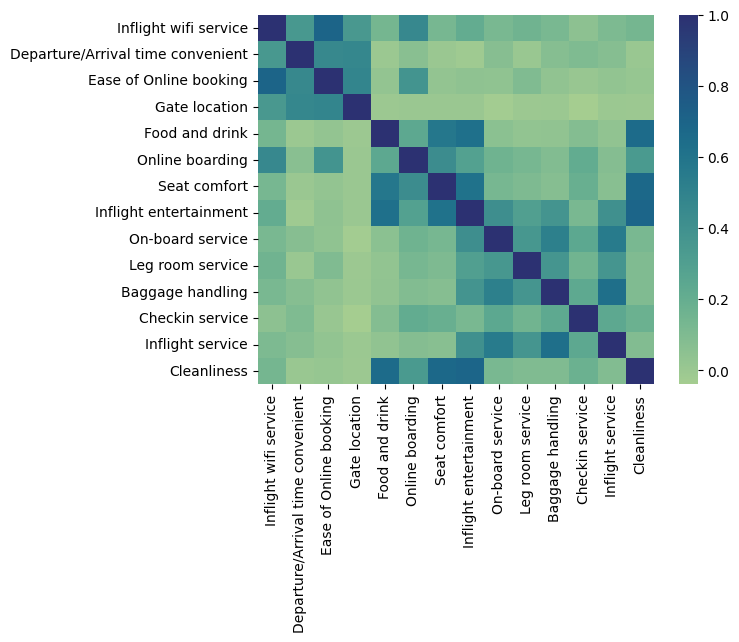

In [10]:
corr = df[categories].corr()

sns.heatmap(corr, cmap='crest')

На графике видно, что некоторые из оценок действительно ведут себя похоже, однако никакой логической взаимосвязи между ними нет.



---


Теперь перейдем к заполнению других столбцов с числовыми данными: восстановим пропущенную информацию аналогично тому, что мы делали раньше.

In [11]:
columns = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']
df = df.dropna(axis='index', how='any', subset=['Age'])
df['Age'] = np.where(df['Age'] < 10, 10, df['Age'])
for col in columns:
    df[col] = np.where(df[col] > 100, 100, df[col])
    col_mean = df[col].mean()
    df[col].fillna(col_mean, inplace=True)
df['Flight Distance'] = np.where(df['Flight Distance'] > 7000, 7000, df['Flight Distance'])
col_mean = df['Flight Distance'].mean()
df['Flight Distance'].fillna(col_mean, inplace=True)

<ipython-input-11-d30c9cac017d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = np.where(df['Age'] < 10, 10, df['Age'])
<ipython-input-11-d30c9cac017d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] > 100, 100, df[col])
<ipython-input-11-d30c9cac017d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [12]:
df.describe()

,id,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129564.000000,129564.000000,129564.000000,129564.000000,129564.000000,129564.000000,129564.000000,129564.000000,129564.000000,129564.000000,129564.000000,129564.000000,129564.000000,129564.000000,129564.000000,129564.000000,129564.000000,129564.000000,129564.000000
mean,64944.777677,40.152975,1200.808458,12.386345,12.672321,2.759070,3.109509,2.801167,2.977503,3.206480,3.276803,3.441922,3.358478,3.383284,3.355801,3.632578,3.306944,3.643184,3.286658
std,37492.111390,20.304321,1025.877738,24.383032,24.494565,1.277709,1.437017,1.328782,1.278698,1.327736,1.301109,1.319063,1.333597,1.287148,1.306146,1.179872,1.266083,1.176281,1.313376
min,1.000000,10.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,32479.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,64944.500000,40.000000,846.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,97415.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,129880.000000,621.000000,7000.000000,100.000000,100.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Пассажиров с неизвестными строковыми данными довольно мало в процентном соотношении, поэтому эту часть можем удалить.

In [13]:
df = df.dropna(axis='index', how='any', subset=['Gender', 'Customer Type', 'Type of Travel', 'Class'])
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,128941,128941,128941,128941,128941
unique,2,2,2,3,3
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65418,105339,89044,61711,58431




---
Теперь, когда мы почистили наши данные, посмотрим, как разные факторы влияют на удовлетворенность полетом.


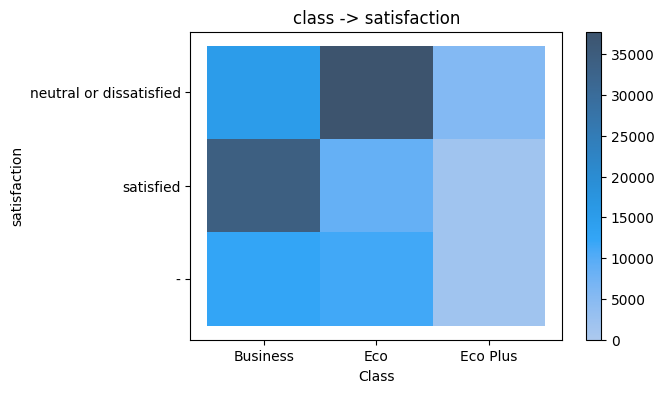

In [14]:
plt.figure(figsize=(6, 4))

sns.histplot(x='Class', y='satisfaction', data=df, cbar=True)
plt.title('class -> satisfaction')
plt.show()

Видим, что удовлетворенность полетом сильно зависит от класса: так среди неудовлетворенных пассажиров большая часть была в эконом классе, в то время как наибольшая часть довольных клиентов путешествовали бизнес классом.

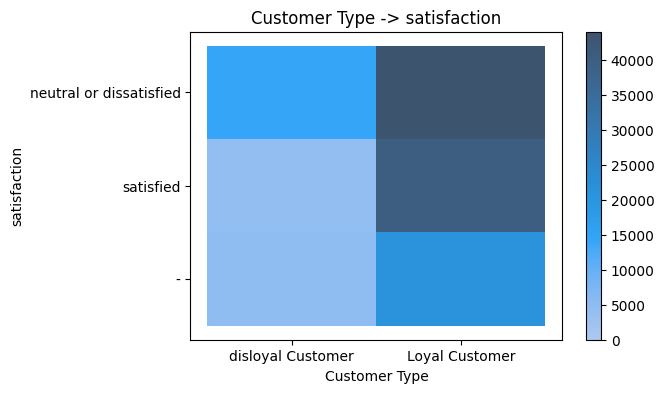

In [15]:
plt.figure(figsize=(6, 4))

sns.histplot(x='Customer Type', y='satisfaction', data=df, cbar=True)
plt.title('Customer Type -> satisfaction')
plt.show()

А вот лояльность клиента авиакомпании на удовлетворенность полетом влияет не так сильно.

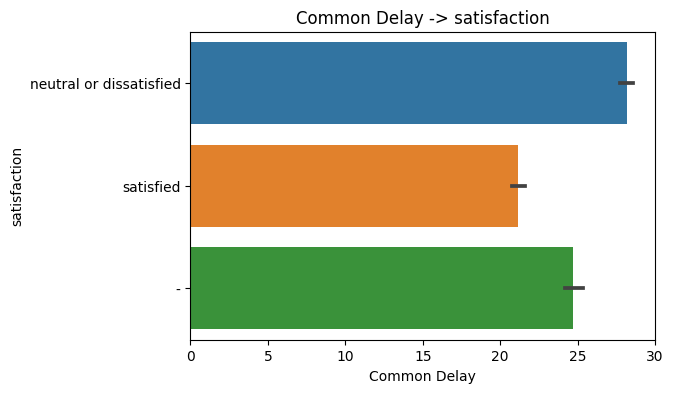

In [16]:
df['Common Delay'] = df['Arrival Delay in Minutes'] + df['Departure Delay in Minutes']

plt.figure(figsize=(6, 4))

sns.barplot(x='Common Delay', y='satisfaction', data=df)
plt.title('Common Delay -> satisfaction')
plt.show()

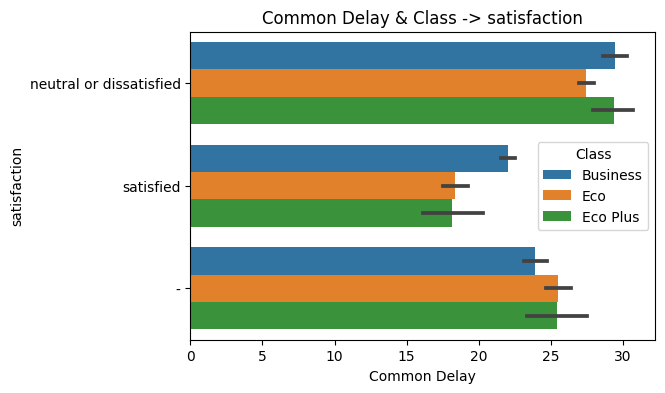

In [17]:
plt.figure(figsize=(6, 4))

sns.barplot(x='Common Delay', y='satisfaction', hue='Class', data=df)
plt.title('Common Delay & Class -> satisfaction')
plt.show()

Выше получили вполне логичную зависимость: у людей, оставшихся недовольными полетом, суммарная задержка вылета и прилета в среднем заметно больше, чем у удовлетворенных пассажиров. Ещё одна понятная зависимость ниже:)

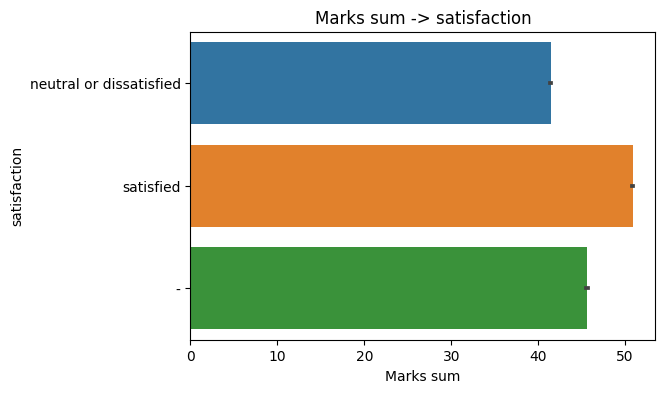

In [18]:
df['Marks sum'] = 0
categories = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
for category in categories:
    df['Marks sum'] += df[category]

plt.figure(figsize=(6, 4))

sns.barplot(x='Marks sum', y='satisfaction', data=df)
plt.title('Marks sum -> satisfaction')
plt.show()

## Выбор и обучение модели

---

Для начала переведем бинарные категориальные признаки в числовые.Кроме того, нашу целевую переменную, satisfaction, тоже переведем в числовую форму.

In [19]:
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})
df['Customer Type'] = df['Customer Type'].map({'disloyal Customer' : 0, 'Loyal Customer' : 1})
df['Type of Travel'] = df['Type of Travel'].map({'Business travel' : 0, 'Personal Travel' : 1})
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})

В столбце с нашей целевой переменной также есть неизвестные значения. Возьмем в датасет для обучения модели данные без неизвестных, и позже, когда нас удовлетворит качество модели, мы сможем предсказать значения на месте этих пропусков.

In [20]:
data = df.loc[df['satisfaction'].isin([0, 1])]

In [60]:
X = data.drop(['satisfaction', 'id'], axis=1)
y = data['satisfaction']

In [61]:
X.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Common Delay,Marks sum
0,0,48.0,0,0,Business,821.0,2.0,5.0,3.0,3.0,...,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,7.0,54.0
1,1,35.0,1,0,Business,821.0,26.0,39.0,2.0,2.0,...,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,65.0,53.0
2,0,41.0,1,0,Business,853.0,0.0,0.0,4.0,4.0,...,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,0.0,55.0
3,0,50.0,1,0,Business,1905.0,0.0,0.0,2.0,2.0,...,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,0.0,53.0
4,1,49.0,1,0,Business,3470.0,0.0,1.0,3.0,3.0,...,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,1.0,49.0


Построим базовое решение, с которым будем сравнивать последующие: для этого обучим нашу модель только на числовых признаках.

In [62]:
X.drop(['Class'], axis=1, inplace=True)

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((77355, 23), (25786, 23))

In [64]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Посмотрим на некоторые оценки нашей модели:

In [65]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.7884510974947646

In [66]:
from sklearn.metrics import recall_score

recall_score(y_test, pred)

0.8330320014463931

In [67]:
from sklearn.metrics import precision_score

precision_score(y_test, pred)

0.7186305856663807

Будем оптимизировать recall_score, не забывая, что precision_score также должен оставаться не слишком маленьким.



---



In [68]:
probs = model.predict_proba(X_test)

probs[:5]

array([[0.93761424, 0.06238576],
       [0.38286098, 0.61713902],
       [0.66458909, 0.33541091],
       [0.27313117, 0.72686883],
       [0.47249482, 0.52750518]])

In [69]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred), recall_score(y_test, pred)

(array([[11116,  3608],
        [ 1847,  9215]]),
 0.8330320014463931)

Подберем оптимальный порог:

In [73]:
classes = probs[:, 1] > 0.07

confusion_matrix(y_test, classes), recall_score(y_test, classes)

(array([[ 1932, 12792],
        [  154, 10908]]),
 0.9860784668233592)

#### Оценка важности признаков

In [74]:
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
ss.fit(X_train)

X_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

In [75]:
model = LogisticRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

In [76]:
model.coef_, model.intercept_

(array([[-0.03972237, -2.09264775,  2.12654002, -3.15248445,  0.78628275,
          0.53943351, -1.17743447,  1.78622265, -0.65131685, -0.21651163,
         -0.22314724, -0.1744721 ,  2.62538907,  0.27409949,  0.02046848,
          1.21883645,  0.97509563,  0.6488849 ,  1.31079063,  0.46290226,
          0.82578528, -0.31900048,  0.86283442]]),
 array([-6.73479433]))

In [77]:
importance = pd.DataFrame({'weights': model.coef_[0], 'features': X_train.columns}).sort_values(by='weights')
importance.head()

,weights,features
3,-3.152484,Type of Travel
1,-2.092648,Age
6,-1.177434,Arrival Delay in Minutes
8,-0.651317,Departure/Arrival time convenient
21,-0.319000,Common Delay


Теперь вспомним о том, что мы выкинули категориальные признаки, вернем их обратно и попробуем заново обучить нашу модель.

In [78]:
X = data.drop(['satisfaction', 'id'], axis=1)
y = data['satisfaction']

X.dtypes

Gender                                 int64
Age                                  float64
Customer Type                          int64
Type of Travel                         int64
Class                                 object
Flight Distance                      float64
Departure Delay in Minutes           float64
Arrival Delay in Minutes             float64
Inflight wifi service                float64
Departure/Arrival time convenient    float64
Ease of Online booking               float64
Gate location                        float64
Food and drink                       float64
Online boarding                      float64
Seat comfort                         float64
Inflight entertainment               float64
On-board service                     float64
Leg room service                     float64
Baggage handling                     float64
Checkin service                      float64
Inflight service                     float64
Cleanliness                          float64
Common Del

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [80]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical = ['Class']
numeric_features = [col for col in X_train.columns if col not in categorical]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])

X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

In [81]:
lst = list(column_transformer.transformers_[0][1].get_feature_names_out())
lst.extend(numeric_features)

X_train_transformed = pd.DataFrame(X_train_transformed, columns=lst)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=lst)

X_train_transformed.head()

,Class_Eco,Class_Eco Plus,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Common Delay,Marks sum
0,0.0,0.0,1.0,0.034884,1.0,0.0,0.040000,0.00,0.00,0.50,...,0.50,0.50,0.25,0.5,0.75,0.00,0.50,0.50,0.000,0.537037
1,1.0,0.0,0.0,0.011628,1.0,1.0,0.046429,0.05,0.06,0.75,...,0.75,0.75,1.00,0.0,0.75,0.50,1.00,0.75,0.055,0.666667
2,0.0,1.0,1.0,0.028239,1.0,0.0,0.088857,0.11,0.02,0.25,...,0.25,0.25,0.00,0.5,0.50,0.50,0.75,0.25,0.065,0.296296
3,0.0,0.0,0.0,0.011628,1.0,0.0,0.234143,1.00,1.00,0.50,...,0.75,0.75,0.25,1.0,1.00,0.75,0.50,0.75,1.000,0.648148
4,1.0,0.0,1.0,0.033223,1.0,1.0,0.065714,0.00,0.01,0.50,...,0.25,0.25,0.75,1.0,0.50,0.75,0.75,0.25,0.005,0.407407


In [82]:
model = LogisticRegression()

model.fit(X_train_transformed, y_train)

pred = model.predict_proba(X_test_transformed)[:, 1]

In [84]:
classes = pred > 0.5

confusion_matrix(y_test, classes), recall_score(y_test, classes)

(array([[13294,  1430],
        [ 1681,  9381]]),
 0.8480383294160188)

In [94]:
classes = pred > 0.07

confusion_matrix(y_test, classes), recall_score(y_test, classes)

(array([[ 6914,  7810],
        [  406, 10656]]),
 0.9632977761706744)

Заметим, что в данном случае добавление категориальных признаков качество нашей модели не улучшило.

In [91]:
importance = pd.DataFrame({'weights': model.coef_[0], 'features': X_train_transformed.columns}).sort_values(by='weights')
importance.head()

,weights,features
5,-2.716288,Type of Travel
3,-2.244996,Age
8,-1.143857,Arrival Delay in Minutes
1,-0.873094,Class_Eco Plus
0,-0.751152,Class_Eco


### Сохранение модели

In [95]:
import pickle

with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

#а так модель можно загрузить из файла:
with open('model.pickle', 'rb') as f:
    model = pickle.load(f)